<h3>Loading File</h3>

In [0]:
#Creation of ClinicalDf dataframe from clinical trial data data in filestore 
ClinicalDF = spark.read.options(delimiter = "|").csv("/FileStore/tables/clinicaltrial_2021.csv/",
                       header = "true",
                       inferSchema="true")
ClinicalDF.display(10, truncate = False)

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


<h3>Question One</h3>
Number of Studies

In [0]:
NumberOfStudies = ClinicalDF.distinct().count()

print("Number of clinical studies:" , NumberOfStudies)

Number of clinical studies: 387261


<h3>Question Two</h3>
Types of Studies in the
dataset along with the frequencies of each type ordered from most frequent to least frequent

In [0]:
# Group the rows by the type column Count the type column and order in descending order

ClinicalDF.groupBy('Type').count().orderBy("count", ascending = False).display()

Type,count
Interventional,301472
Observational,77540
Observational [Patient Registry],8180
Expanded Access,69


<h3>Question Three</h3>
 Top 5 conditions with their frequencies.

In [0]:
from pyspark.sql.functions import *

df = ClinicalDF
def count_conditions(df):
    # Split the Conditions column into separate columns
    df1 = df.select("Conditions").withColumn('split', split(df["Conditions"], ","))
    
    # Explode the split column to create separate rows for each condition
    df1exploded = df1.withColumn('Conditions', explode(df1.split)).select('Conditions')
    
    # Count the frequency of each condition and order by count in descending order
    df_count = df1exploded.groupBy('Conditions').count().orderBy('count', ascending=False)
    
    return df_count
#Use function to display result
conditions_df = count_conditions(df)
conditions_df.display(5)


+-----------------+-----+
|       Conditions|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



Loading Pharma Dataset

In [0]:
PharmaDF = spark.read.options(delimeter = ",").csv("/FileStore/tables/pharma.csv/",
                       header = "true",
                       inferSchema="false")
PharmaDF.display()

Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,null
Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,null,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors.,federal,agency action,Food and Drug Administration referral to the Justice Department,civil and criminal,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote,null
Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,null,"Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations, that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases,null
"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,null,federal,agency action,Labor Department Wage and Hour Division,civil,null,null,1527129,null,null,Puerto Rico,San Juan,null,null,423450,"423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php","Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide ca

<h3>Question Four</h3>
10 most common sponsors that are not pharmaceutical companies, along
with the number of clinical trials they have sponsored.

In [0]:
df = ClinicalDF
df1 = PharmaDF

def top_sponsors_count(df,df1):
    #Left anti join the two dataframes on Sponsor and parent_company columns
    common_sponsors = df.join(df1, df["Sponsor"] == df1["Parent_Company"], "left_anti")
    #Select and order top ten accounts by count and group by Sponsor column
    top_sponsors = common_sponsors.groupBy('Sponsor').count().orderBy("count", ascending = False).limit(10).display()
    return top_sponsors
#Use function to display results
top_sponsors_count(df,df1)

Sponsor,count
National Cancer Institute (NCI),3218
M.D. Anderson Cancer Center,2414
Assistance Publique - Hôpitaux de Paris,2369
Mayo Clinic,2300
Merck Sharp & Dohme Corp.,2243
Assiut University,2154
Novartis Pharmaceuticals,2088
Massachusetts General Hospital,1971
Cairo University,1928
Hoffmann-La Roche,1828


<h3>Question Five</h3>
Plot number of completed studies each month in a given year

In [0]:
def comp(df): 
    #selects columns completion and Status where Status is Completed 
    new = df.select(['Completion', 'Status']).where(df['Status'] == 'Completed')
    return new 
Filtered_df= comp(df)
# Splits the 'Completion' column into 'Month' and 'year' columns using the space character as a delimiter.
Filtered_df = Filtered_df.withColumn('Month', split(Filtered_df['Completion'], ' ').getItem(0)).withColumn('year', split(Filtered_df['Completion'], ' ').getItem(1))
# Filters to keep only rows where the year column is 2021, groups by Month column and counts frequency for each month
Filtered_df = Filtered_df.where(Filtered_df.year == 2021).select('Month').groupBy('Month').count() 
unsorted_df = Filtered_df.show()




+-----+-----+
|Month|count|
+-----+-----+
|  Oct|  187|
|  Sep|  528|
|  Aug|  700|
|  May|  984|
|  Jun| 1094|
|  Feb|  934|
|  Mar| 1227|
|  Jan| 1131|
|  Apr|  967|
|  Jul|  819|
+-----+-----+



In [0]:
df = Filtered_df
import calendar

# Define a list of month abbreviations in the correct order
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
# Loop through the month abbreviations and create a new DataFrame with sorted rows
new_rows = []
for month in month_order:
    row = df.filter(df.Month == month).first()
    if row is not None:
        new_rows.append(row)
#Create CompletedMonths dataframe using new_rows list
CompletedMonths = spark.createDataFrame(new_rows, df.schema)
#display results
CompletedMonths.display()

Month,count
Jan,1131
Feb,934
Mar,1227
Apr,967
May,984
Jun,1094
Jul,819
Aug,700
Sep,528
Oct,187


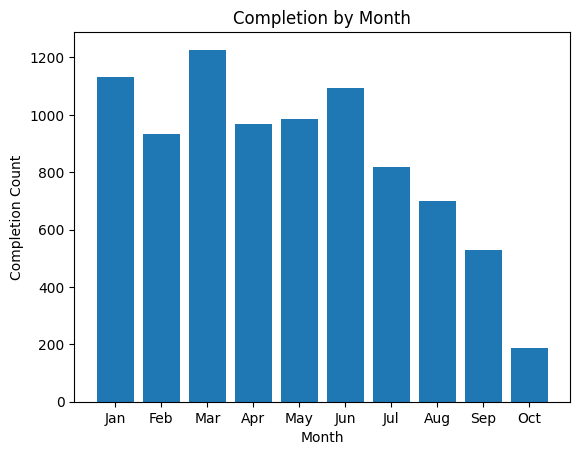

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert CompletedMonths to a Pandas DataFrame
pandas_comp = CompletedMonths.toPandas()

# Create a bar plot
plt.bar(pandas_comp['Month'], pandas_comp['count'])
plt.title('Completion by Month')
plt.xlabel('Month')
plt.ylabel('Completion Count')
plt.show()

In [0]:
PharmaDF.display()

Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,null
Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,null,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors.,federal,agency action,Food and Drug Administration referral to the Justice Department,civil and criminal,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote,null
Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,null,"Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations, that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases,null
"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,null,federal,agency action,Labor Department Wage and Hour Division,civil,null,null,1527129,null,null,Puerto Rico,San Juan,null,null,423450,"423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php","Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide ca

<h3>Additional Queries</h3>
<b>Cities with the most Pharma Companies</b>

In [0]:
df = PharmaDF
def get_top_cities(df):
    df = df.filter(col("City").isNotNull())
    top_cities = df.groupBy("City").count().orderBy("count", ascending=False).limit(10)
    return top_cities

top_cities = get_top_cities(df)
top_cities.display()

City,count
CINCINNATI,5
MEMPHIS,4
SOUTH SAN FRANCISCO,4
St. Joseph,3
Cambridge,3
Irvine,3
Groton,3
ST. LOUIS,3
Mexico,3
Elkton,3


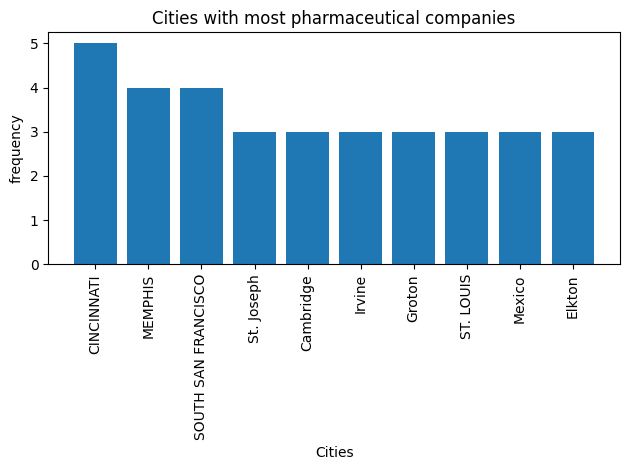

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert CompletedMonths to a Pandas DataFrame
pandas_comp = top_cities.toPandas()

# Create a bar plot
plt.bar(pandas_comp['City'], pandas_comp['count'])
plt.title('Cities with most pharmaceutical companies')
plt.xlabel('Cities')
plt.ylabel('frequency')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()